In [72]:
import numpy as np
import pandas as pd

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [74]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\train.csv",usecols = ['Age', 'Fare', 'Survived'])

In [75]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [76]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [77]:
df.dropna(inplace = True)

In [78]:
df.shape

(714, 3)

In [79]:
X = df.drop('Survived',axis = 1)
y = df.iloc[:,0]

In [80]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [82]:
X_train.head(4)

,Age,Fare
369,24.0,69.3000
113,20.0,9.8250
638,41.0,39.6875
791,16.0,26.0000


In [83]:
clf = DecisionTreeClassifier()

In [84]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.6853146853146853

In [86]:
np.mean(cross_val_score(clf, X, y, cv=10, scoring = 'accuracy'))

np.float64(0.6275234741784037)

In [87]:
kbin_age = KBinsDiscretizer(n_bins=15, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode = 'ordinal', strategy = 'quantile')

In [88]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [89]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [90]:
trf.named_transformers_['first'].n_bins_

array([15])

In [91]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.67,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 27.  , 29.  ,
              32.  , 34.  , 38.  , 41.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [92]:
trf.named_transformers_['second'].n_bins_

array([15])

In [93]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.2292,   7.775 ,   7.8958,   8.3625,  10.5   ,
               13.    ,  14.5   ,  20.25  ,  26.    ,  27.7208,  31.3875,
               49.5   ,  76.2917, 110.8833, 512.3292])                   ],
      dtype=object)

In [94]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [95]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                               bins = trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                               bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [96]:
output.sample(6)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
142,24.0,5.0,15.850,7.0,"(23.0, 25.0]","(14.5, 20.25]"
16,2.0,0.0,29.125,10.0,"(0.67, 6.0]","(27.721, 31.388]"
588,22.0,4.0,8.050,3.0,"(21.0, 23.0]","(7.896, 8.362]"
104,37.0,10.0,7.925,3.0,"(34.0, 38.0]","(7.896, 8.362]"
635,28.0,7.0,13.000,6.0,"(27.0, 29.0]","(10.5, 13.0]"
66,29.0,8.0,10.500,5.0,"(27.0, 29.0]","(8.362, 10.5]"


In [99]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 =  clf.predict(X_test_trf)

In [104]:
accuracy_score(y_test,y_pred2)

0.6713286713286714

In [103]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring='accuracy'))

np.float64(0.6331181533646322)

In [130]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode = 'ordinal', strategy = strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring='accuracy')))

    plt.figure(figsize = (14,10))
    plt.subplot(221)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(222)
    plt.hist(X_trf[:,0],color = 'red')
    plt.title('After')

    plt.subplot(223)
    plt.hist(X['Fare'])
    plt.title('Before fare')

    plt.subplot(224)
    plt.hist(X_trf[:,1],color = 'red')
    plt.title('After fare')
    plt.show()

0.6345070422535211


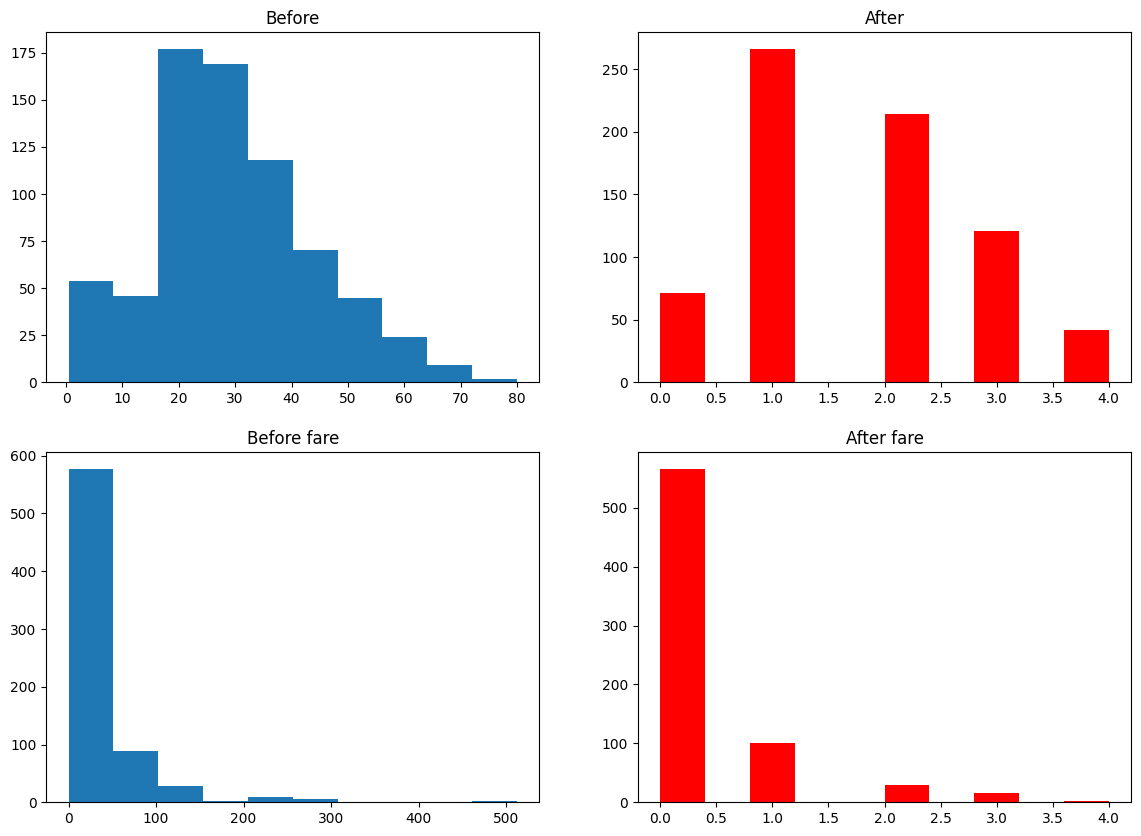

In [131]:
discretize(5,'kmeans')

0.6344679186228482


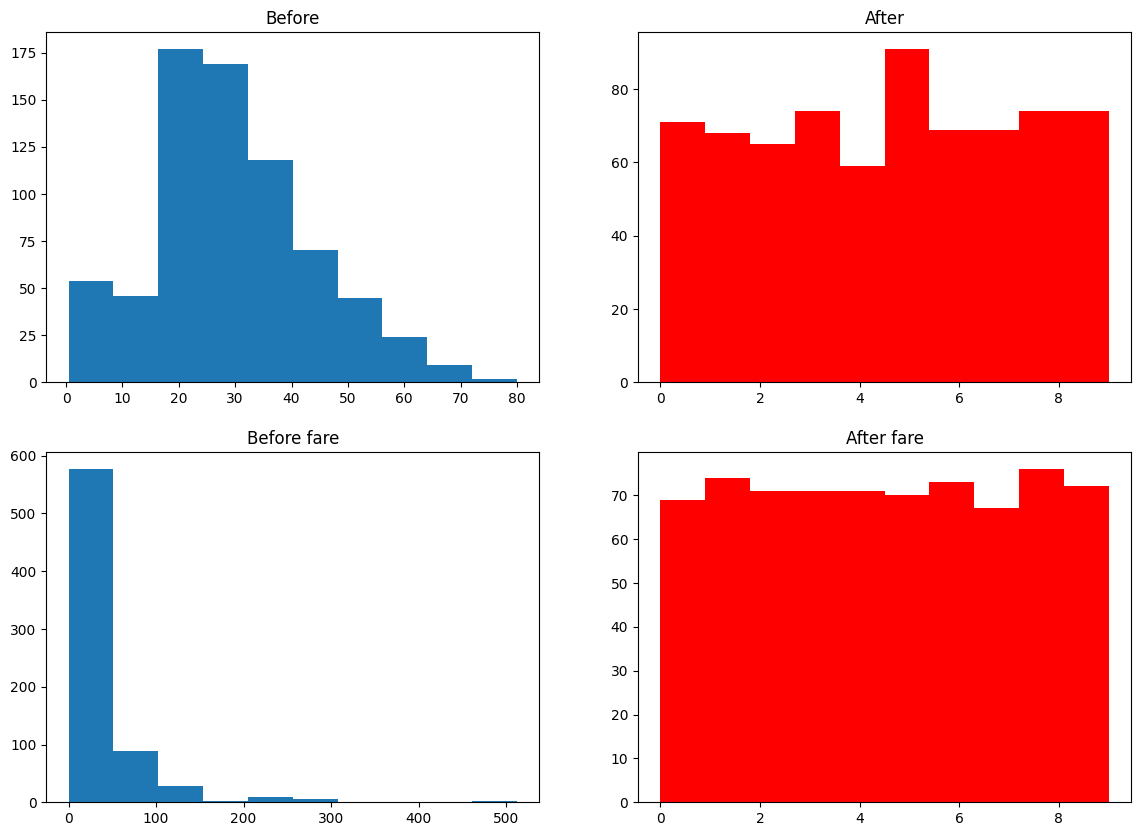

In [132]:
discretize(10,'quantile')

0.6330594679186229


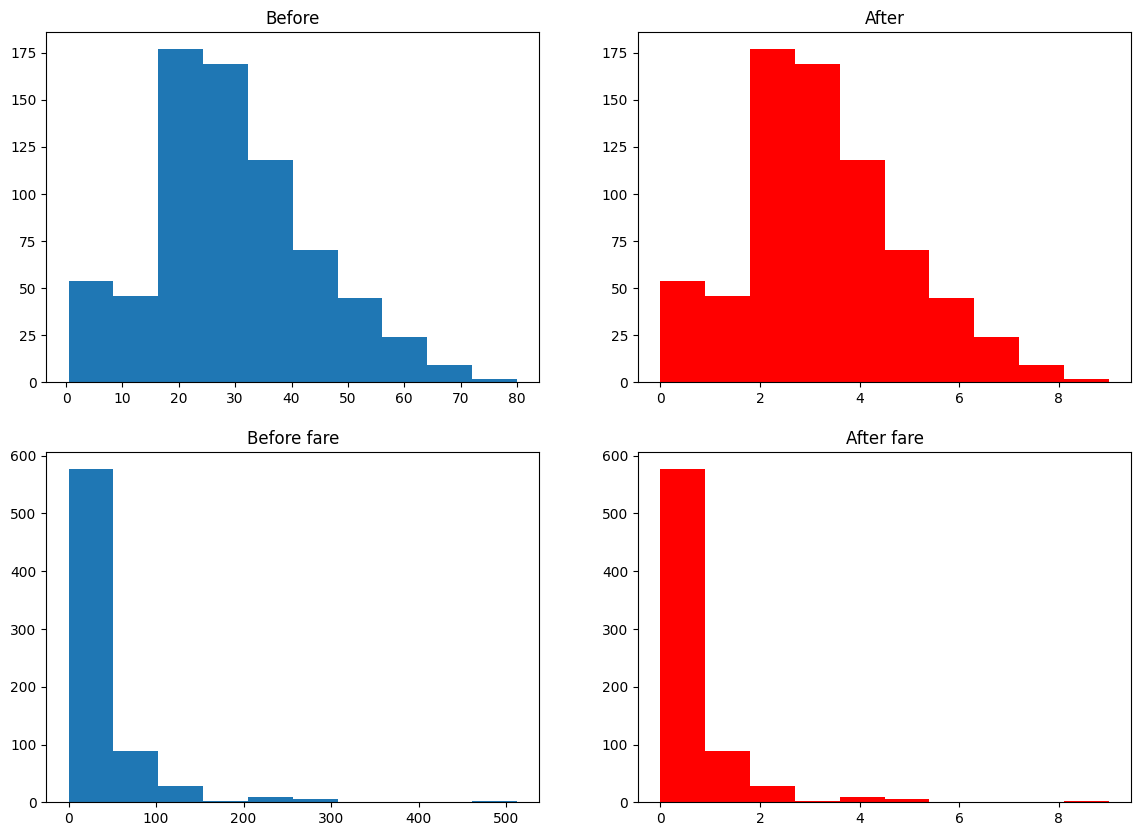

In [133]:
discretize(10,'uniform')